Rotated Image Dimensions: 5816x5753


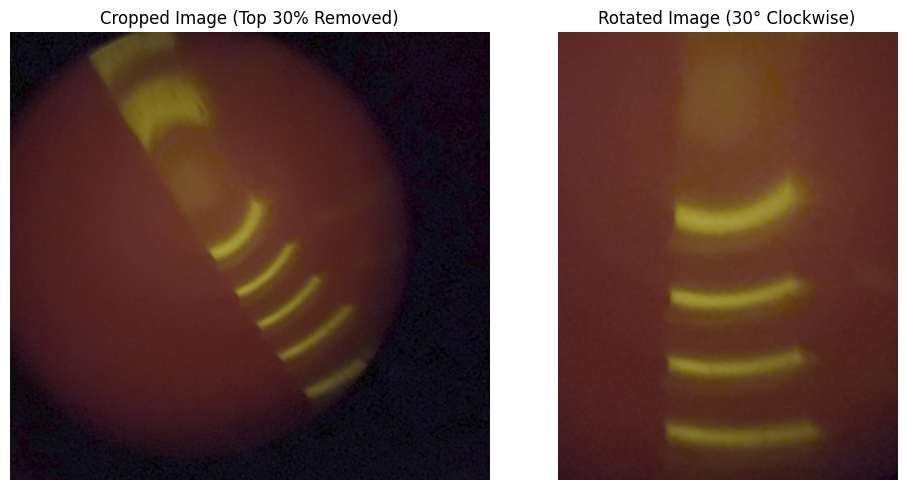

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the input image
image = cv2.imread('pattern_0.png')

# Crop the top 30% of the image
height, width = image.shape[:2]
crop_height = int(0.3 * height)  # Calculate the height to crop
cropped_image = image[crop_height:, :]  # Crop from 30% to the bottom

# Rotate the image clockwise by 30 degrees
angle = -36  # Negative angle for clockwise rotation
center = (width // 2, (height - crop_height) // 2)  # Center of rotation
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)

# Calculate the new bounding dimensions of the rotated image
cos = np.abs(rotation_matrix[0, 0])
sin = np.abs(rotation_matrix[0, 1])
new_width = int((height - crop_height) * sin + width * cos)
new_height = int((height - crop_height) * cos + width * sin)

# Adjust the rotation matrix to account for translation
rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

# Perform the rotation
rotated_image = cv2.warpAffine(cropped_image, rotation_matrix, (new_width, new_height))
new_height, new_width = rotated_image.shape[:2]
print(f'Rotated Image Dimensions: {new_width}x{new_height}')
rotated_image = rotated_image[int(new_height*0.3):int(new_height*0.7), int(new_width*0.35):int(new_width*0.65)]

# Display the images
plt.figure(figsize=(10, 5))

# Cropped Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image (Top 30% Removed)')
plt.axis('off')

# Rotated Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (30° Clockwise) and Cropped')
plt.axis('off')

plt.tight_layout()
plt.show()


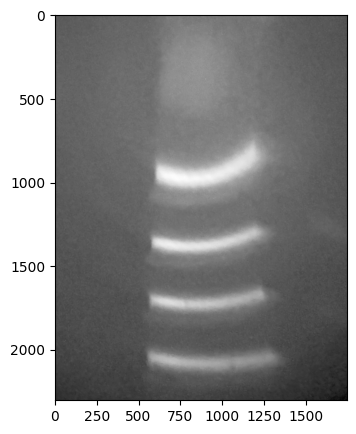

In [26]:
# Convert rotated image to grayscale
gray_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# Plot the grayscale image
plt.figure(figsize=(10, 5))
plt.imshow(gray_image, cmap='gray')

In [28]:
from PIL import Image
import pillow_heif

# Load the HEIC image
heic_file = "IMG_0582.HEIC"  # Replace with your HEIC file name
image = Image.open(heic_file)

# Resize the image to reduce size (e.g., 50% of original dimensions)
new_width = image.width // 2
new_height = image.height // 2
resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)

# Save as PNG with optimized settings
output_file = "output_image.png"  # Output file name
resized_image.save(output_file, format="PNG", optimize=True)

print(f"Converted and resized image saved as: {output_file}")


UnidentifiedImageError: cannot identify image file 'IMG_0582.HEIC'